Classification Report:
              precision    recall  f1-score  support
0              0.946667  0.959459  0.953020   74.000
1              0.945946  0.921053  0.933333   38.000
2              0.915254  0.915254  0.915254   59.000
3              0.931034  0.931034  0.931034   29.000
accuracy       0.935000  0.935000  0.935000    0.935
macro avg      0.934725  0.931700  0.933161  200.000
weighted avg   0.934996  0.935000  0.934951  200.000


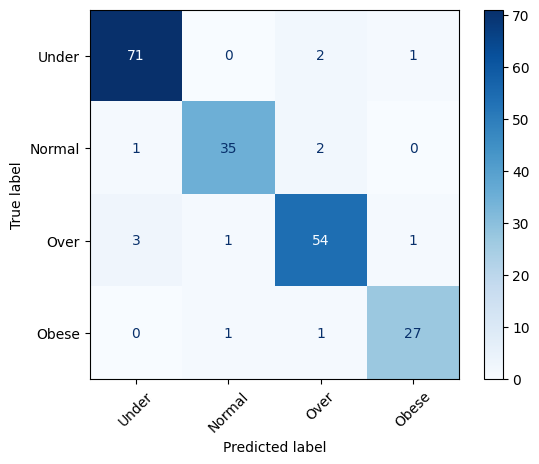

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("obesity_data_processed_final1.csv")

# fitur (x) label (y)
X = df[['Age', 'Gender', 'Weight', 'Height', 'BMI', 'PhysicalActivityLevel']]
y = df['ObesityCategory']

# split data: training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# latih model
model = RandomForestClassifier(random_state=7)
model.fit(X_train, y_train)

# prediksi dari data uji 
y_pred = model.predict(X_test)

# evaluasi hasil 
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Under', 'Normal', 'Over', 'Obese']).plot(cmap='Blues', xticks_rotation=45)

# simpan hasil
logreg_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_LogReg': y_pred
})
logreg_df.to_csv("Randomf_predictions.csv", index=False)